In [276]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 8

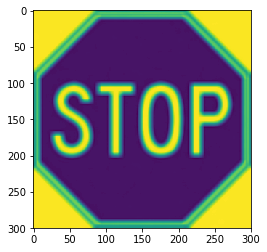

In [277]:
img1 = cv.imread('data/stopSignSample.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
#img2 = cv.imread('data/stopSignSample2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
img2 = cv.imread('data/sign2.ppm',cv.IMREAD_GRAYSCALE) # trainImage

img1 = cv.GaussianBlur(img1,(9,9),7)
# img1 = cv.resize(img1,(100,100))
img2 = cv.resize(img2,(300,300))




sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)        

plt.imshow(img1)


In [281]:
if len(good)>MIN_MATCH_COUNT:
    print "Matches Found - %d" % (len(good))
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,10)
    matchesMask = mask.ravel().tolist()
    
    print(M)

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)

#     img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)

else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None


Matches Found - 11
[[ 6.84377901e-01  7.54220801e-02  5.23514890e+01]
 [-3.45884641e-02  8.47757727e-01  4.00738773e+01]
 [-3.78928634e-05  2.76057633e-04  1.00000000e+00]]


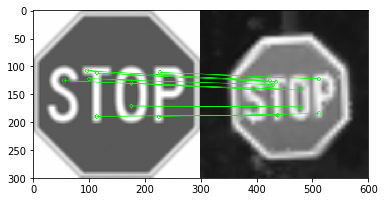

(<matplotlib.image.AxesImage at 0x12c715950>, None)

In [282]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

[150 250   1]
[200 250   1]
[200 200   1]
[150 200   1]


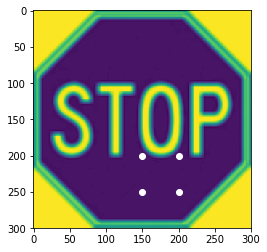

In [283]:

# plt.figure(0)
# plt.imshow(img1)
# plt.plot(50,70, 'o', color="white")

# points = []
# points.append(np.asarray([50,70,1]))

points = []
points.append(np.asarray([150,250,1]))
points.append(np.asarray([200,250,1]))
points.append(np.asarray([200,200,1]))
points.append(np.asarray([150,200,1]))
plt.figure(0)
plt.imshow(img1)
for point in points:
    print(point)
    plt.plot(point[0],point[1], 'o', color="white");

In [284]:

print(points)
transposedPoints = []

for point in points:

    transposedPoints.append(np.dot(M,point))

print(transposedPoints)

[array([150, 250,   1]), array([200, 250,   1]), array([200, 200,   1]), array([150, 200,   1])]
[array([173.86369423, 246.82503952,   1.06333048]), array([208.08258929, 245.09561632,   1.06143584]), array([204.31148529, 202.70772995,   1.04763295]), array([170.09259022, 204.43715315,   1.0495276 ])]


[173.86369423 246.82503952   1.06333048]
[208.08258929 245.09561632   1.06143584]
[204.31148529 202.70772995   1.04763295]
[170.09259022 204.43715315   1.0495276 ]


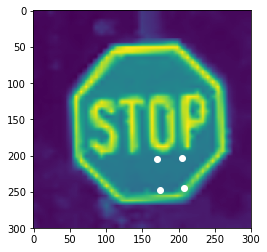

In [285]:
plt.figure(1)
plt.imshow(img2)
for point in transposedPoints:
    print(point)
    plt.plot(point[0],point[1], 'o', color="white");